<a href="https://colab.research.google.com/github/Alejods90/SQL_Tourism/blob/main/Portfolio_fifa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Portfolio FIFA**
by: Alejandro Alzate

FIFA stands for Federation Internationale de Football Association

I got this Dataset from Kaggle: https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset


This link is a guide that will help you to understand the positions in FIFA:    https://fifauteam.com/fifa-21-positions/

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hoja de Vida/Hoja_de_vida_ingles/players_22.csv')
df=df[['short_name','player_positions', 'overall', 'potential', 'value_eur', 'wage_eur','age', 'height_cm', 'weight_kg', 'club_name', 'league_name','league_level',	'club_position',	'club_jersey_number',
'nationality_name','nation_position','nation_jersey_number','preferred_foot',	'weak_foot', 'skill_moves', 'work_rate',
'body_type', 'release_clause_eur', 'skill_curve', 'attacking_heading_accuracy']]
df

<ipython-input-1-4c32f6b0ac32>:4: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Hoja de Vida/Hoja_de_vida_ingles/players_22.csv')


,short_name,player_positions,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,work_rate,body_type,release_clause_eur,skill_curve,attacking_heading_accuracy
0,L. Messi,"RW, ST, CF",93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,...,RW,10.0,Left,4,4,Medium/Low,Unique,144300000.0,93,70
1,R. Lewandowski,ST,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,...,RS,9.0,Right,4,4,High/Medium,Unique,197200000.0,79,90
2,Cristiano Ronaldo,"ST, LW",91,91,45000000.0,270000.0,36,187,83,Manchester United,...,ST,7.0,Right,4,5,High/Low,Unique,83300000.0,81,90
3,Neymar Jr,"LW, CAM",91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,...,NaN,NaN,Right,5,5,High/Medium,Unique,238700000.0,88,63
4,K. De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,181,70,Manchester City,...,RCM,7.0,Right,5,4,High/High,Unique,232200000.0,85,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,70000.0,1000.0,22,180,64,Wuhan FC,...,NaN,NaN,Right,3,2,Medium/Medium,Lean (170-185),114000.0,33,48
19235,C. Porter,CM,47,59,110000.0,500.0,19,175,70,Derry City,...,NaN,NaN,Right,3,2,Medium/Medium,Lean (170-185),193000.0,53,46
19236,N. Logue,CM,47,55,100000.0,500.0,21,178,72,Finn Harps,...,NaN,NaN,Right,3,2,Medium/Medium,Lean (170-185),175000.0,37,43
19237,L. Rudden,ST,47,60,110000.0,500.0,19,173,66,Finn Harps,...,NaN,NaN,Right,3,2,Medium/Medium,Lean (170-185),239000.0,36,40


Let's start by identifying the players who occupy the same position in both the club and the national league team.

In [ ]:
same_position=df['short_name'][df['club_position']==df['nation_position']]
same_position

0                 L. Messi
2        Cristiano Ronaldo
4             K. De Bruyne
7                 M. Neuer
9                  H. Kane
               ...        
11636          J. Marković
12610               Xu Xin
13648           J. McGarry
13948             A. Rațiu
14476             A. Rufer
Name: short_name, Length: 216, dtype: object

Interesting, not many of them. Now, it's a good idea to create an overview of the position's players and their general value.

In [ ]:
position_stats=df.groupby('player_positions')['overall'].describe()
position_stats

,count,mean,std,min,25%,50%,75%,max
player_positions,,,,,,,,
CAM,219.0,62.652968,7.530862,47.0,57.00,62.0,68.00,88.0
"CAM, CDM",11.0,61.636364,8.297864,49.0,56.00,63.0,66.50,74.0
"CAM, CDM, CM",4.0,66.750000,4.193249,64.0,64.75,65.0,67.00,73.0
"CAM, CDM, LM",1.0,75.000000,NaN,75.0,75.00,75.0,75.00,75.0
"CAM, CDM, RM",1.0,67.000000,NaN,67.0,67.00,67.0,67.00,67.0
...,...,...,...,...,...,...,...,...
"ST, RW",98.0,64.959184,6.681130,50.0,61.00,65.0,70.00,84.0
"ST, RW, CAM",4.0,68.000000,9.018500,57.0,64.50,68.0,71.50,79.0
"ST, RW, LM",2.0,61.500000,2.121320,60.0,60.75,61.5,62.25,63.0


And who is the best player according to FIFA? How far is he from average players? Let's find out.

In [ ]:
best_player=df['short_name'][df['overall']==df['overall'].max()].iloc[0]
best_player

'L. Messi'

In [ ]:
above_average=round(df['overall'].max()-df['overall'].mean(),2)
above_average

27.23

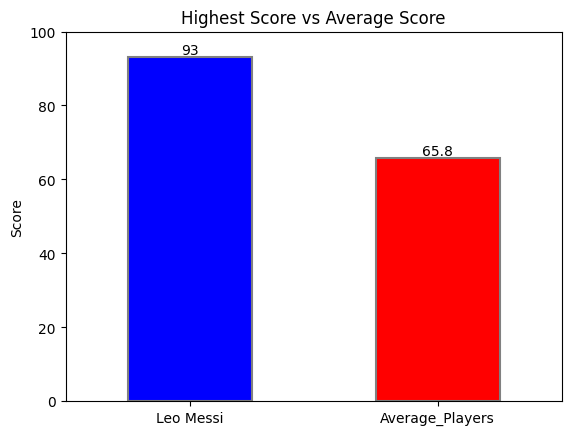

In [ ]:
fig, ax = plt.subplots()
bars=ax.bar(['Leo Messi', 'Average_Players'],[df['overall'].max(), round(df['overall'].mean(),1)],
       width=0.5, label=['Leo Messi', 'Average_Players'], color=['blue', 'red'], edgecolor='gray', linewidth=1.5)
ax.bar_label(bars)
ax.set_xlim((-0.5,1.5))
ax.set_ylim(0,100)
ax.set_ylabel('Score')
ax.set_title('Highest Score vs Average Score');

Lionel Messi is the best football soccer player in the world according to FIFA.
Now, let's create a dream team.

In [ ]:
dream_team=df[['short_name','player_positions','overall']][df['overall']>=89]
dream_team

,short_name,player_positions,overall
0,L. Messi,"RW, ST, CF",93
1,R. Lewandowski,ST,92
2,Cristiano Ronaldo,"ST, LW",91
3,Neymar Jr,"LW, CAM",91
4,K. De Bruyne,"CM, CAM",91
5,J. Oblak,GK,91
6,K. Mbappé,"ST, LW",91
7,M. Neuer,GK,90
8,M. ter Stegen,GK,90
9,H. Kane,ST,90


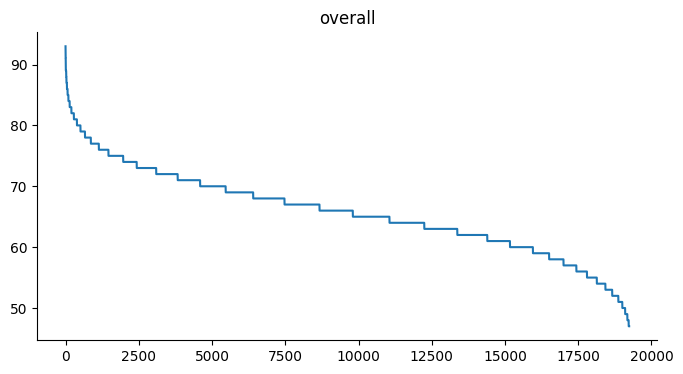

In [ ]:
from matplotlib import pyplot as plt
df['overall'].plot( figsize=(8, 4), title='overall')
plt.gca().spines[['top', 'right']].set_visible(False)

Text(0, 0.5, 'Number of players')

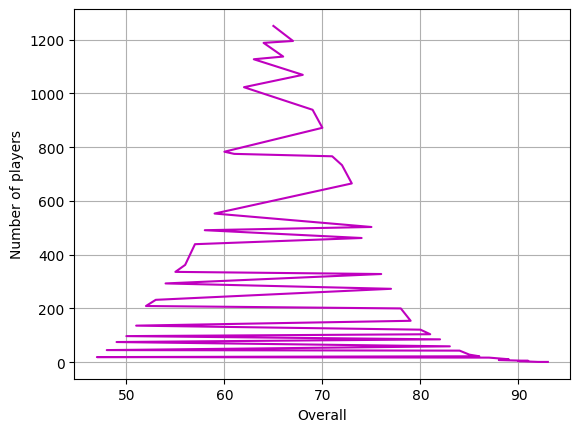

In [ ]:
plt.plot(df['overall'].value_counts(),color='m');
plt.grid()
plt.xlabel('Overall')
plt.ylabel('Number of players')

Is there any correlation between the age and the overall value as a player?

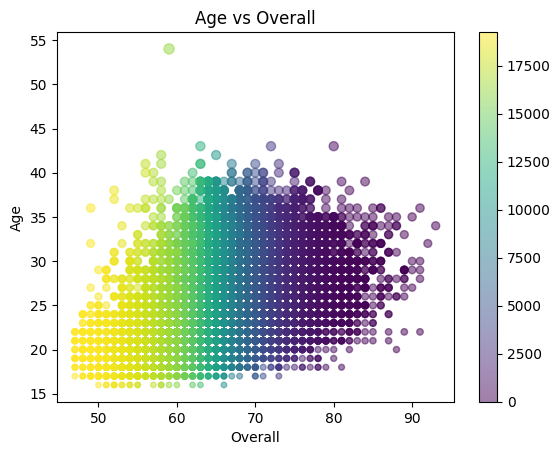

In [ ]:
y=df['age']
x=df['overall']

plt.scatter(x,y, c=range(len(df['age'])), s=df['age'], alpha=0.5)
plt.title("Age vs Overall")
plt.xlabel("Overall")
plt.ylabel("Age")
plt.colorbar()
plt.show()

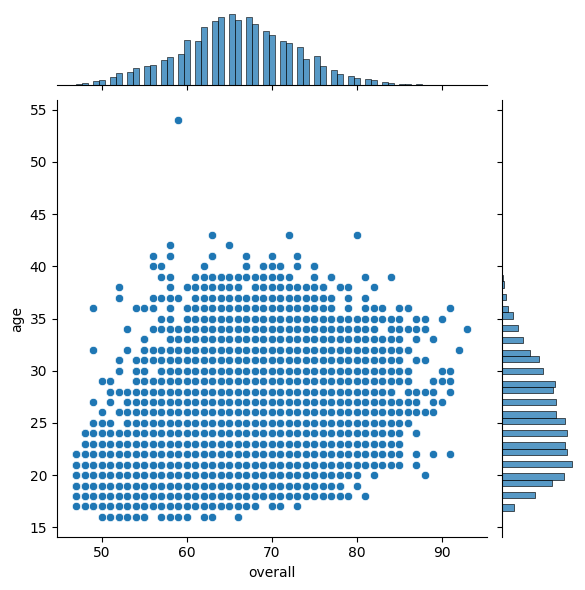

In [ ]:
import seaborn as sns
sns.jointplot(x=x,y=y);

In [ ]:
corr_age_overall=x.corr(y)
corr_age_overall

0.4594506532601405

Doesn't look like a big correlation, so is not too late to play :V
What other insights can we draw? What about the Countries with the tallest players?

In [ ]:
nationality_height=round(df.groupby('nationality_name')['height_cm'].mean().sort_values(ascending=False).head(20),1)
nationality_height

nationality_name
Central African Republic    189.5
Eritrea                     189.0
Latvia                      188.1
Chad                        188.0
Vietnam                     188.0
Faroe Islands               187.3
Syria                       186.5
Serbia                      186.2
Lebanon                     186.0
Lithuania                   185.9
Bosnia and Herzegovina      185.8
Croatia                     185.7
Iceland                     185.3
Montenegro                  185.2
Senegal                     185.0
Slovakia                    184.8
Iran                        184.6
Denmark                     184.5
Benin                       184.4
Finland                     184.2
Name: height_cm, dtype: float64

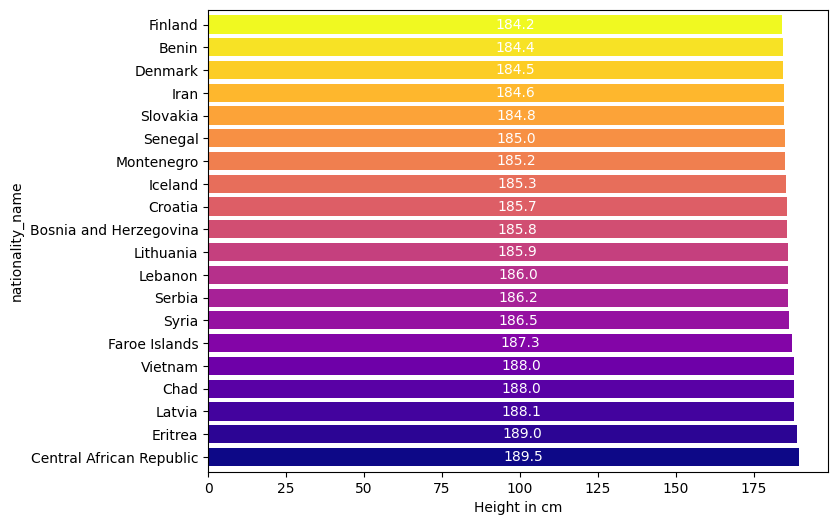

In [ ]:
import matplotlib as mpl
import numpy as np

plt.figure(figsize=(8,6))
cmap=mpl.colormaps['plasma']
colors= cmap(np.linspace(0,1,len(nationality_height)))
bars=nationality_height.plot(x='nationality_name',y='height_cm',kind='barh', color=colors, width=0.8);

for bar, height in zip(bars.patches,nationality_height.values):
    bars.text(bar.get_x() + bar.get_width() / 2, bar.get_y()+bar.get_height()/2, height, color = 'white', ha = 'left', va = 'center')

bars.set_xlabel('Height in cm');

The tallest players are widespread over several continents. Let's take a look at the players that are reaching their full potential.

In [ ]:
best_performers=int(round(len(df['short_name'][df['overall']==df['potential']])/len(df['short_name']),2)*100)
best_performers=str(best_performers) + '%'
best_performers


'33%'

<ipython-input-13-c08225af7b63>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation=45)


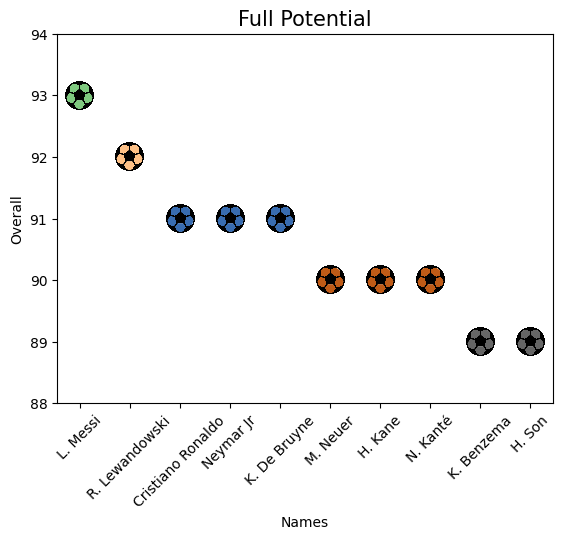

In [ ]:

import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np

names=df['short_name'][df['overall']==df['potential']].head(10)
overall=df['overall'][df['overall']==df['potential']].head(10)

cmap=mpl.colormaps['Accent']
cmaps2= cmap(np.linspace(0,1,5))
ball_colors=[]
ball_colors.append(cmaps2[0])
ball_colors.append(cmaps2[1])
ball_colors.append(cmaps2[2])
ball_colors.append(cmaps2[2])
ball_colors.append(cmaps2[2])
ball_colors.append(cmaps2[3])
ball_colors.append(cmaps2[3])
ball_colors.append(cmaps2[3])
ball_colors.append(cmaps2[4])
ball_colors.append(cmaps2[4])



fig, ax = plt.subplots()

x = names
y = overall


# reading the image
image = plt.imread('/content/drive/MyDrive/Colab Notebooks/soccer.png')

# OffsetBox
image_box = OffsetImage(image, zoom=0.08)

# creating annotation for each point
# on the graph
x, y = np.atleast_1d(x, y)

# for each value of (x,y), we create
# an annotation
for x0, y0 in zip(x, y):
    ab = AnnotationBbox(image_box, (x0, y0), frameon=False)
    ax.add_artist(ab)

ax.scatter(x,y, s=350, color=ball_colors)
ax.set_ylim(88,94);
ax.set_title('Full Potential', fontsize=15)
ax.set_xticklabels(names, rotation=45)
ax.set_xlabel('Names')
ax.set_ylabel('Overall');


In [ ]:
df['quartile']= pd.qcut(df['overall'],
                             q = 4, labels = False)
upper_quartile=df['short_name'][df['quartile']==3]
upper_quartile

0                L. Messi
1          R. Lewandowski
2       Cristiano Ronaldo
3               Neymar Jr
4            K. De Bruyne
              ...        
4588               Blanco
4589        Miguel Crespo
4590          G. Kotsiras
4591           M. Osmajić
4592            S. Lončar
Name: short_name, Length: 4593, dtype: object

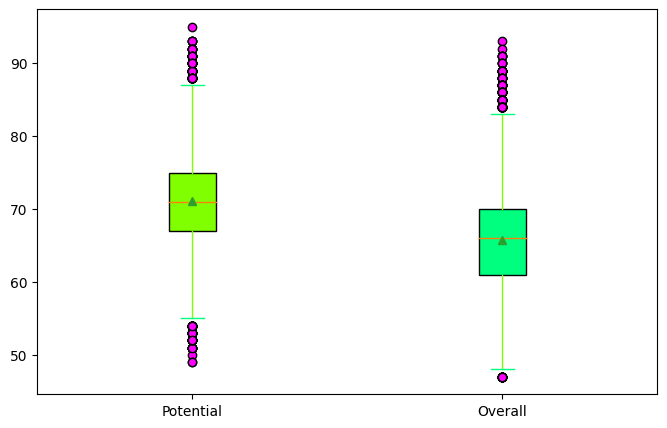

In [ ]:
fig=plt.figure(figsize=(8,5))
ax=plt.subplot()
axs=ax.boxplot([df['potential'],df['overall']],patch_artist=True, showmeans=True,flierprops=dict(markerfacecolor='fuchsia'));
colors=['chartreuse','springgreen']

for box, color in zip(axs['boxes'],colors):
  box.set_facecolor(color)

for whisker in axs['whiskers']:
  whisker.set(color='chartreuse')

for cap in axs['caps']:
  cap.set(color='springgreen')

ax.set_xticks([1,2],['Potential','Overall']);

Only 33% of the players reach their full potential.

Are there some guys bulked or heavy playing football? And is there any correlation between a player's physical attributes and the specific positions they play on the field?

In [ ]:
heaviest_players_position=df.groupby(['player_positions','nationality_name'])[['weight_kg']].mean().sort_values('weight_kg',ascending=False).head(20).astype(int)
heaviest_players_position

weight_kg
player_positions nationality_name           
GK               Guyana                   98
CB               Faroe Islands            95
RB, RM           Peru                     94
GK               Congo DR                 94
                 Mali                     93
ST               New Zealand              92
GK               Latvia                   91
CB, CDM, CM      Croatia                  91
CB, RB           Montserrat               91
ST, LW, RW       Netherlands              90
LM, RW, LW       Netherlands              90
CDM              Senegal                  90
ST, LW, RW       Canada                   90
CAM, CM          Malaysia                 90
CB               North Macedonia          90
CAM, RW, ST      Slovenia                 90
ST, RM, LM       Nigeria                  90
CB, LWB          Nigeria                  90
ST, LW, RW       Colombia                 89
ST, CF           Congo                    89

The goalkeeper and the defensive positions tend to be the heaviest players in this sport.

You might think that the taller a player, the more he has an attacking_heading_accuracy. But the data shows something different.

In [ ]:
x1=df['attacking_heading_accuracy']
y1=df['height_cm']

x1.corr(y1)         #Not a correlation at all.

0.008761503073310188

 Who is/are the player(s) that has/have the highest release_clause according to his/their wage?


In [ ]:
df['wage_clause']=df['release_clause_eur']/df['wage_eur']
max_release_clause=df[['short_name','wage_clause']][df['wage_eur']==df['wage_eur'].max()]
max_release_clause

,short_name,wage_clause
4,K. De Bruyne,663.428571
11,K. Benzema,386.571429


In [ ]:
min_release_clause=df[['short_name','wage_clause']][df['wage_eur']==df['wage_eur'].min()]
min_release_clause

,short_name,wage_clause
1450,A. Hložek,76800.0
1467,A. Pyatov,2600.0
2375,D. Akpeyi,2000.0
3122,A. Gabbarini,1100.0
3654,C. Cáceda,6800.0
...,...,...
19233,R. Gallagher,478.0
19235,C. Porter,386.0
19236,N. Logue,350.0
19237,L. Rudden,478.0


Who has the lowest?... It seems like plenty of them.

In [ ]:
unique_GK=df[['short_name','overall']][(df['player_positions']=='GK')&(df['body_type']=='Unique')]
unique_GK

,short_name,overall
5,J. Oblak,91
7,M. Neuer,90
8,M. ter Stegen,90
12,T. Courtois,89
18,Ederson,89
20,Alisson,89
21,G. Donnarumma,89
31,H. Lloris,87
48,S. Handanovič,86
106,De Gea,84


According to the data, goalkeepers with unique body types also are among the best players.

Let's convert the jersey number to integers because you don't see a float on the jersey
:V

In [ ]:
df['club_jersey_number']=df['club_jersey_number'].fillna(0)
df['club_jersey_number']=df['club_jersey_number'].astype(int)
df['club_jersey_number']

0        30
1         9
2         7
3        10
4        17
         ..
19234    36
19235    27
19236    31
19237    12
19238    13
Name: club_jersey_number, Length: 19239, dtype: int64

In [ ]:
df['club_jersey_number'].value_counts()

7     627
10    623
11    620
8     620
6     619
     ... 
86      5
73      4
62      4
84      3
83      3
Name: club_jersey_number, Length: 100, dtype: int64

7 is the jersey number that repeats the most.

In [ ]:
df['club_jersey_number'].sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

Well, the jersey numbers go from 1 to 99.

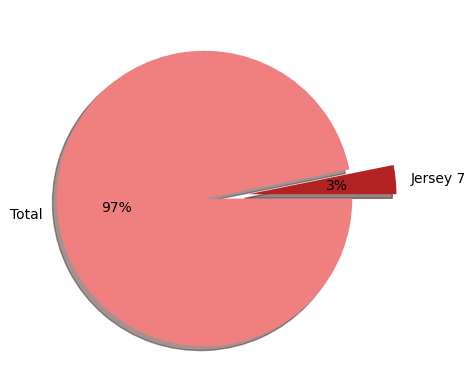

In [ ]:
jersey_7=df['club_jersey_number'].value_counts().iloc[0]
overall_jersey=df['club_jersey_number'].value_counts().sum()
plt.pie([jersey_7, overall_jersey],explode=(0,0.3), labels=['Jersey 7','Total'], autopct='%1.0f%%', shadow=True,colors=['firebrick','lightcoral'] )
plt.show()

Let's say is not a big percentage -but still is the highest-, although later on we can explore the relevance of this jersey number for a team.

In [ ]:
df.groupby(['club_jersey_number'])['skill_curve'].mean().sort_values(ascending=False)

club_jersey_number
10    64.319422
7     60.188198
11    59.843548
83    59.000000
8     58.920968
        ...    
41    36.955224
62    35.500000
86    34.000000
40    32.111111
1     15.130952
Name: skill_curve, Length: 100, dtype: float64

It shows that a player who wears jersey number 7 needs to be really skilled.

Thanks for taking a look at this portfolio. You can find my profile on LinkedIn:

https://www.linkedin.com/in/alejandro-alzate-b530b11a8/?locale=en_US